In [3]:
##Question1 Importing the packages
import re
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
%matplotlib inline

In [12]:
digit = load_digits()
X = digit.data
Y = digit.target

In [13]:
x.shape , Y.shape

((1797, 64), (1797,))

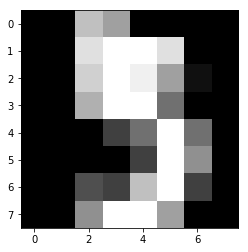

In [9]:
##question2
plt.imshow(x[5].reshape(8,8),cmap=plt.cm.gray)

In [14]:
##question 3
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [15]:
##Question 4
reg = LogisticRegression()
reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
#Question 5(a)classification accuarcy means no. of cross predictions made as a ratio of all predictions made.
pred = reg.predict(X_test)

In [17]:
result = pd.DataFrame({"Predicted":pred,"Actual":Y_test})
result

,Actual,Predicted
0,1,1
1,0,0
2,6,6
3,4,4
4,3,3
5,8,8
6,0,0
7,9,9
8,7,7
9,1,1


In [18]:
kfold= model_selection.KFold(n_splits=10,random_state=8)


In [19]:
results=model_selection.cross_val_score(reg,X,Y,cv=kfold,scoring='accuracy')
results

array([0.90555556, 0.95      , 0.89444444, 0.91666667, 0.94444444,
       0.97222222, 0.97777778, 0.95530726, 0.8603352 , 0.93854749])

In [20]:
results.sum()/10

0.931530105524519

In [21]:
#Question 5(b) Logarithmic loss means performancemetrics for evaluating the predictions.
results=model_selection.cross_val_score(reg,X,Y,cv=kfold,scoring='neg_log_loss')
results

array([-0.45798961, -0.14435058, -0.61749705, -0.27323142, -0.27594697,
       -0.12815811, -0.11024468, -0.1233365 , -0.62592303, -0.68553964])

In [22]:
results.sum()/10

-0.3442217575018163

In [23]:
#Question 5(f)confusion matrix means presentation of the accuarcy of a model.
confusion_matrix(Y_test,pred)

array([[40,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 53,  1,  0,  0,  1,  0,  0, 10,  1],
       [ 0,  1, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 57,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 52,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  1,  2],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 48,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  1, 48]], dtype=int64)

In [24]:
#Question 5(g)classification report function display the precision, recall,f1 score and support for each class.
print (classification_report(Y_test,pred))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        41
          1       0.95      0.80      0.87        66
          2       0.98      0.98      0.98        54
          3       1.00      0.94      0.97        51
          4       1.00      1.00      1.00        57
          5       0.95      0.96      0.95        54
          6       1.00      1.00      1.00        60
          7       0.98      0.95      0.96        57
          8       0.77      0.96      0.86        50
          9       0.91      0.96      0.93        50

avg / total       0.95      0.95      0.95       540



In [46]:
##Question 5(c)R2 metrics provides an indication of goodness of a set of predictions to the actual values.
reg1 = LinearRegression()
results=model_selection.cross_val_score(reg1,X,Y,cv=kfold,scoring='r2')
results

array([0.40105499, 0.63102463, 0.57072313, 0.59629035, 0.54519634,
       0.67174215, 0.61763556, 0.47611004, 0.4236549 , 0.41044286])

In [47]:
results.sum()/10

0.5343874961263955

In [42]:
#Question 5(d)Mean absolute error means the sum of the absolute differences b/w predictions and actual values.
results=model_selection.cross_val_score(reg1,X,Y,cv=kfold,scoring='neg_mean_absolute_error')
results

array([-1.76232318, -1.33110792, -1.55360439, -1.51943658, -1.50040068,
       -1.30773649, -1.41940728, -1.60049753, -1.62693098, -1.75390435])

In [43]:
results.sum()/10

-1.5375349366952842

In [39]:
#Question 5(e)Mean squared error means provides a gross idea of the magnitude of error.
results=model_selection.cross_val_score(reg1,X,Y,cv=kfold,scoring='neg_mean_squared_error')
results

array([-5.08763116, -2.93563178, -3.5440648 , -3.35720712, -3.61041109,
       -2.77252253, -3.06878144, -4.29164324, -4.76128221, -4.75789407])

In [40]:
results.sum()/10

-3.81870694491852